# Generate volcanic ERF from NorESM

Takes the total atmospheric aerosol optical depth from ensemble member 45 in Bethke et al. (2017) and the no-volcano control, estimates ERF

Theme song: The Birth and Death of the Day<br>
Artist: Explosions in the Sky<br>
Album: All of a Sudden I Miss Everyone<br>
Released: 2007

In [1]:
import numpy as np
import matplotlib.pyplot as pl
import pandas as pd
import scipy.stats as st

In [2]:
bethke_data = np.loadtxt('../data_input/Bethke_et_al_2017_NCC/NorESM1_AerosolMass_AODVIS_GMST_2006-2099.txt')

Data is from personal communication with Ingo Bethke

Columns
1. year,
2. month
3. strat volc aerosol load in Tg of mem45
4. AODVIS of mem45
5. AODVIS of volc-fre
6. GMST of mem45
7. GMST of volc-free

In [3]:
bethke_df = pd.DataFrame(data=bethke_data, columns=['year', 'month', 'burden_mem45', 'aod_mem45', 'aod_ctl', 'gmst_mem45', 'gmst_ctl'])

In [4]:
bethke_df

,year,month,burden_mem45,aod_mem45,aod_ctl,gmst_mem45,gmst_ctl
0,2006.0,1.0,0.0,0.0585,0.0596,285.43,285.00
1,2006.0,2.0,0.0,0.0631,0.0666,285.35,285.18
2,2006.0,3.0,0.0,0.0683,0.0714,286.10,286.05
3,2006.0,4.0,0.0,0.0690,0.0696,287.07,286.93
4,2006.0,5.0,0.0,0.0739,0.0780,287.87,287.99
...,...,...,...,...,...,...,...
1123,2099.0,8.0,0.0,0.0570,0.0567,290.36,290.12
1124,2099.0,9.0,0.0,0.0518,0.0506,289.61,289.68
1125,2099.0,10.0,0.0,0.0462,0.0468,288.72,288.79
1126,2099.0,11.0,0.0,0.0468,0.0471,287.77,287.85


In [5]:
bethke_df['delta_aod'] = bethke_df['aod_mem45'] - bethke_df['aod_ctl']
bethke_df['delta_gmst'] = bethke_df['gmst_mem45'] - bethke_df['gmst_ctl']

In [6]:
bethke_df

,year,month,burden_mem45,aod_mem45,aod_ctl,gmst_mem45,gmst_ctl,delta_aod,delta_gmst
0,2006.0,1.0,0.0,0.0585,0.0596,285.43,285.00,-0.0011,0.43
1,2006.0,2.0,0.0,0.0631,0.0666,285.35,285.18,-0.0035,0.17
2,2006.0,3.0,0.0,0.0683,0.0714,286.10,286.05,-0.0031,0.05
3,2006.0,4.0,0.0,0.0690,0.0696,287.07,286.93,-0.0006,0.14
4,2006.0,5.0,0.0,0.0739,0.0780,287.87,287.99,-0.0041,-0.12
...,...,...,...,...,...,...,...,...,...
1123,2099.0,8.0,0.0,0.0570,0.0567,290.36,290.12,0.0003,0.24
1124,2099.0,9.0,0.0,0.0518,0.0506,289.61,289.68,0.0012,-0.07
1125,2099.0,10.0,0.0,0.0462,0.0468,288.72,288.79,-0.0006,-0.07
1126,2099.0,11.0,0.0,0.0468,0.0471,287.77,287.85,-0.0003,-0.08


In [7]:
# I have to admit, I did not expect the burden-sAOD relationship to be this linear :)
reg = st.linregress(bethke_df['burden_mem45'], bethke_df['delta_aod'])
reg

LinregressResult(slope=0.0032090333746115193, intercept=0.0005728978087089567, rvalue=0.9986342141597724, pvalue=0.0, stderr=5.003300172168362e-06, intercept_stderr=9.231149854941423e-05)

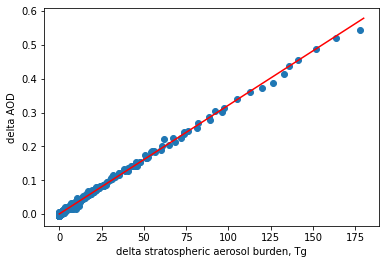

In [8]:
pl.scatter(bethke_df['burden_mem45'], bethke_df['delta_aod'])
pl.xlabel('delta stratospheric aerosol burden, Tg')
pl.ylabel('delta AOD')
pl.plot(np.linspace(0,180,100), reg.slope*np.linspace(0,180,100)+reg.intercept, color='r')

In [9]:
# conversion to ERF = -21 * regression slope (sAOD/Tg) * burden (Tg) + 0.2
# -21 is the conversion for NorESM2
# +0.2 offset is the quiescent year forcing in the AR6 time series
year = np.arange(2006+1/24, 2100, 1/12)

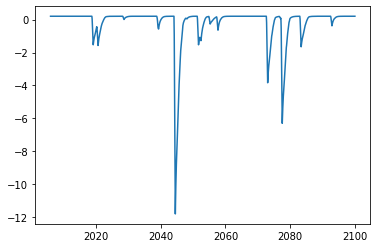

In [10]:
pl.plot(year, -21 * reg.slope * bethke_df['burden_mem45'] + reg.intercept + 0.2)

In [11]:
np.mean(-21 * reg.slope * bethke_df['burden_mem45'] + reg.intercept + 0.2)

-0.18023029076159452

In [12]:
df = pd.DataFrame({'year': year, 'ERF': -21 * reg.slope * bethke_df['burden_mem45'].squeeze() + reg.intercept + 0.2})
df.set_index('year', inplace=True)
df.to_csv('../data_output/xcbox4.1_ERF.csv')

In [13]:
df

,ERF
year,
2006.041667,0.200573
2006.125000,0.200573
2006.208333,0.200573
2006.291667,0.200573
2006.375000,0.200573
...,...
2099.625000,0.200573
2099.708333,0.200573
2099.791667,0.200573
